In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
up_data = pd.read_csv('up_data.csv')

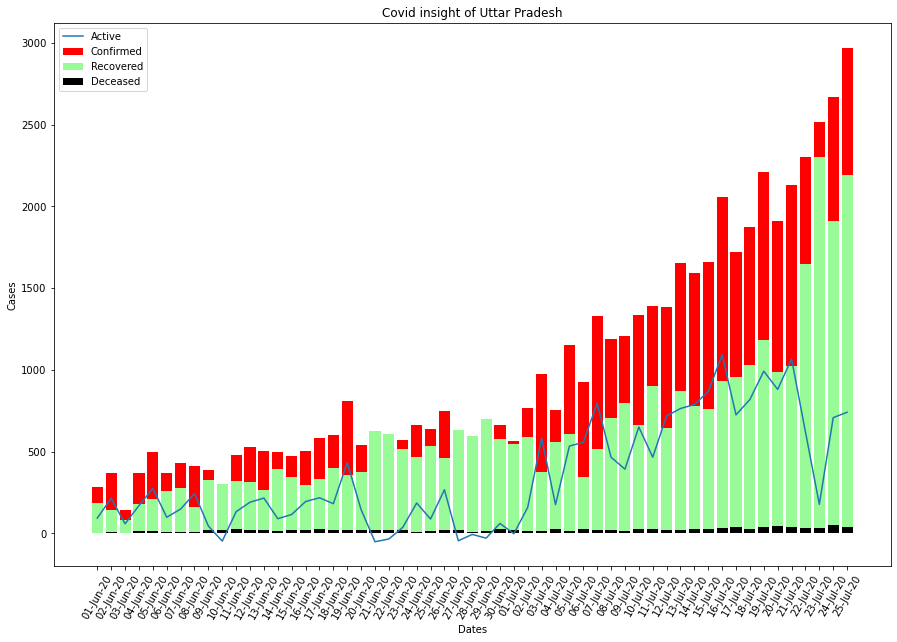

In [3]:
plt.figure(figsize = (15, 10))
plt.bar(up_data['Date'], up_data['Confirmed'], color = 'red')
plt.bar(up_data['Date'], up_data['Recovered'], color = 'palegreen')
plt.bar(up_data['Date'], up_data['Deceased'], color = 'black')
plt.plot(up_data['Date'], up_data['Active'])
plt.xticks(rotation = 60)
plt.legend(['Active', 'Confirmed', 'Recovered', 'Deceased'])
plt.title('Covid insight of Uttar Pradesh')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.show()

Text(0.5, 1.0, 'Comparision')

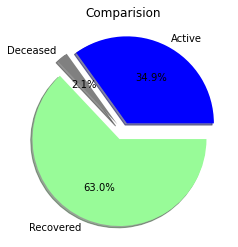

In [4]:
plt.pie([up_data['Active'].sum() , up_data['Deceased'].sum(), up_data['Recovered'].sum()], explode=(0.1, 0.1, 0.1), labels=['Active', 'Deceased', 'Recovered'], colors=['blue', 'grey', 'palegreen'], shadow=True, autopct='%1.1f%%')
plt.title('Comparision')

In [5]:
ut_data = pd.read_csv('ut_data.csv')

In [6]:
br_data = pd.read_csv('br_data.csv')

In [7]:
jh_data = pd.read_csv('jh_data.csv')

In [8]:
states = [up_data, ut_data, br_data, jh_data]
graph = [['Confirmed', 'Recovered'],
         ['Deceased', 'Active']]

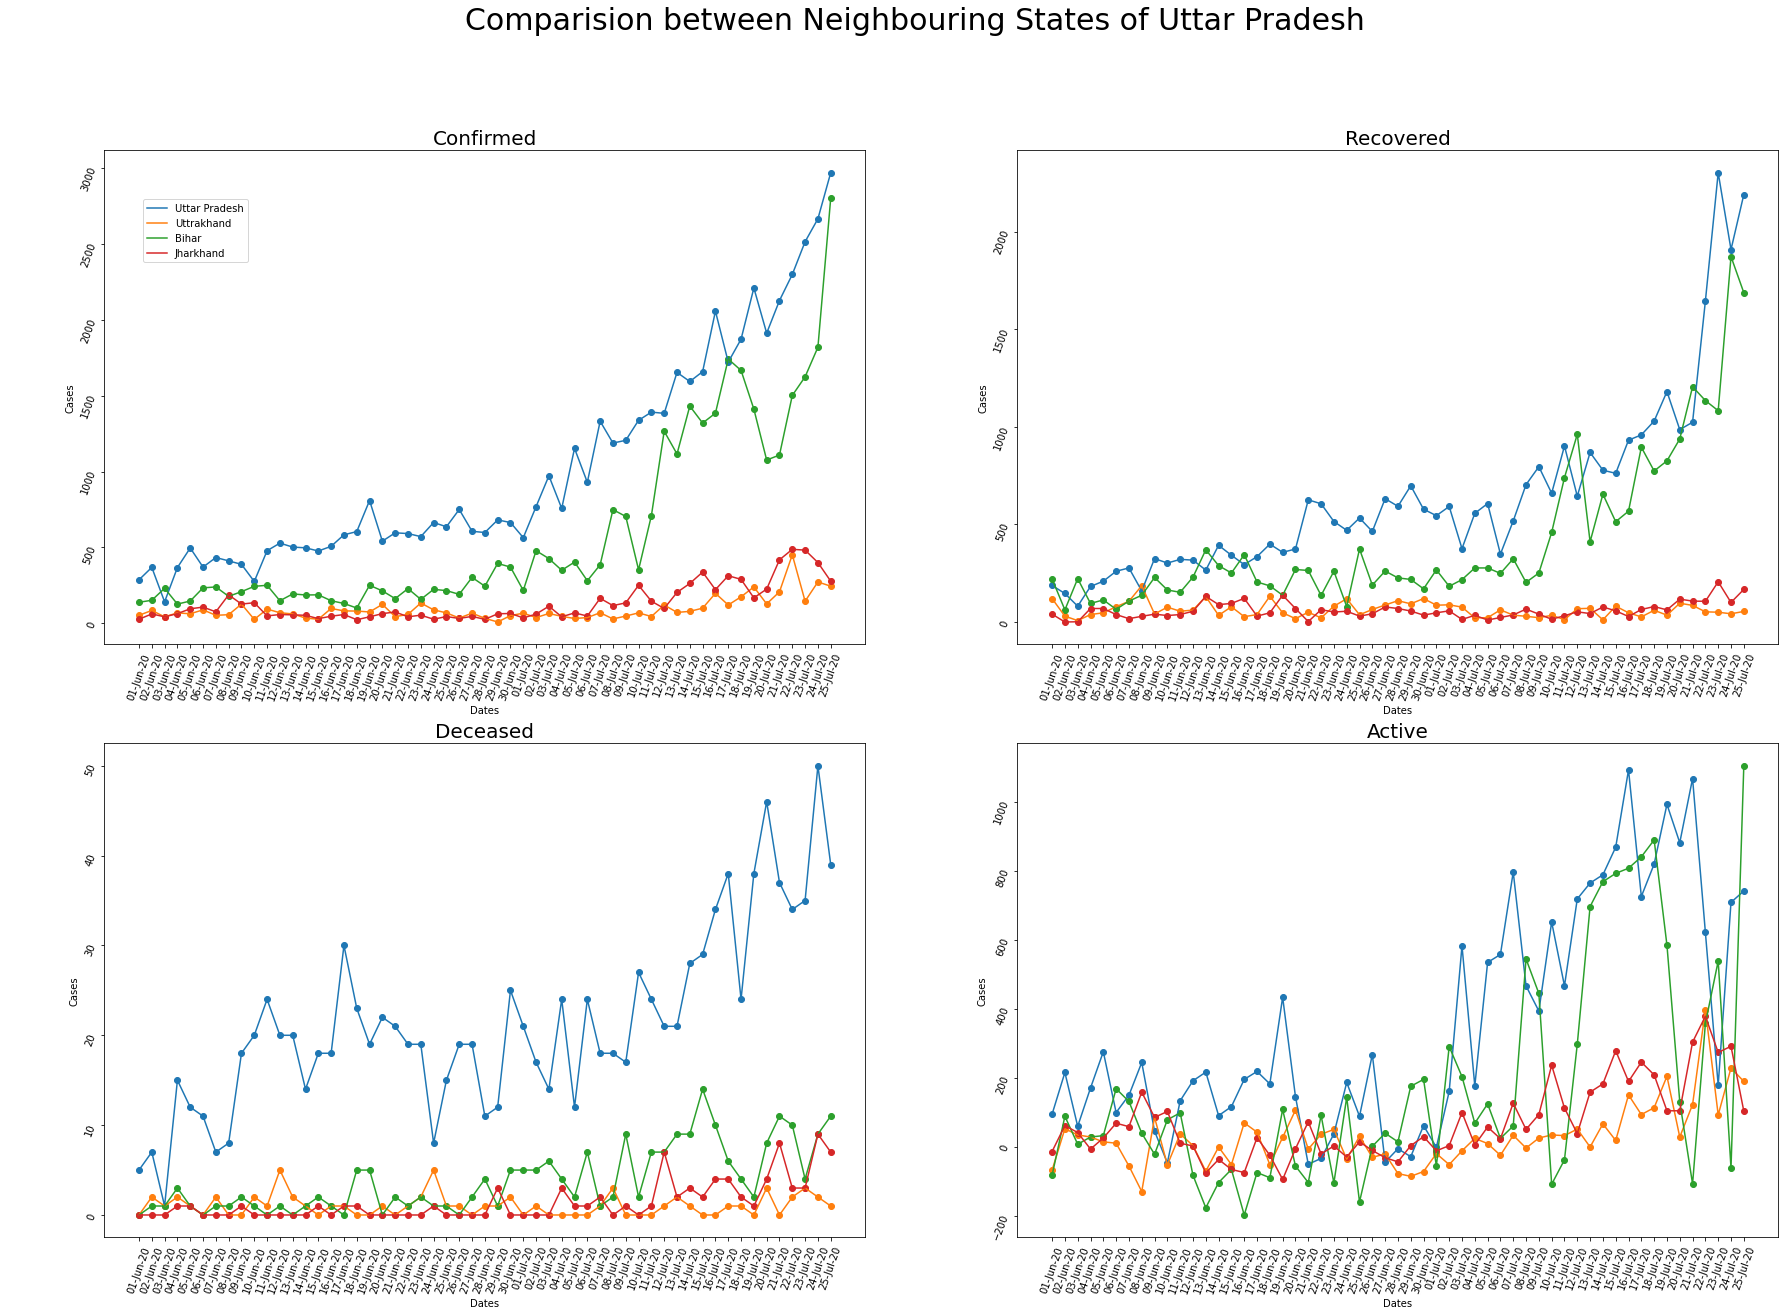

In [9]:
fig, xy = plt.subplots(2, 2, figsize = (30, 20))
_ = fig.suptitle("Comparision between Neighbouring States of Uttar Pradesh", fontsize = 30)

for i in range(0, 2):
    for j in range(0, 2):
        for state in states:
            xy[i][j].plot(state['Date'], state[graph[i][j]])
            xy[i][j].scatter(state['Date'], state[graph[i][j]])
        xy[i][j].set_title(graph[i][j], fontsize = 20)
        xy[i][j].tick_params(labelrotation = 70)
        xy[i][j].set(xlabel = "Dates", ylabel = 'Cases')

fig.legend(labels = ['Uttar Pradesh', 'Uttrakhand', 'Bihar', 'Jharkhand'], loc = (0.08, 0.8))

In [10]:
graph = ['Confirmed', 'Active', 'Recovered', 'Deceased']

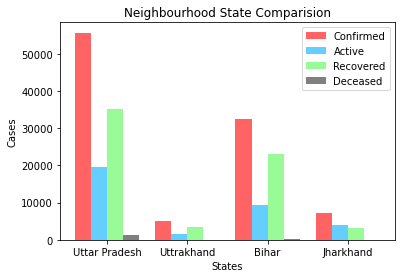

In [11]:
indices = np.arange(0.5, 3.6, 1)
color = ['#ff6363', '#63ceff', 'palegreen', 'grey']
width = 0.2
plt.title('Neighbourhood State Comparision')
for i in range(4):
    plt.bar(indices + (i * width), [up_data[graph[i]].sum(), ut_data[graph[i]].sum(), br_data[graph[i]].sum(), jh_data[graph[i]].sum()], color = color[i], width = 0.2)
plt.xticks(ticks = [0.8, 1.8, 2.8, 3.8], labels = ['Uttar Pradesh', 'Uttrakhand', 'Bihar', 'Jharkhand'])
plt.xlabel('States')
plt.ylabel('Cases')
plt.legend(['Confirmed', 'Active', 'Recovered', 'Deceased'])

In [12]:
population = [204200000, 10100000, 99000000, 31900000]
def cmr(deaths, state):
    return (deaths/population[state]) * 100000

Text(0.5, 1.0, 'Comparision in CMR of Different States')

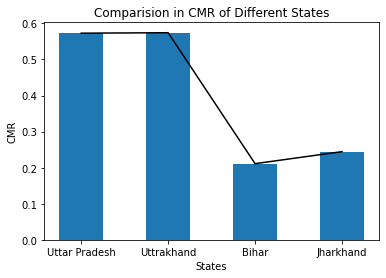

In [13]:
cmr_data = [cmr(states[i]['Deceased'].sum(), i) for i in range(4)]
plt.bar([0.5, 1.5, 2.5, 3.5], cmr_data, width = 0.5)
plt.xticks(ticks = [0.5, 1.5, 2.5, 3.5], labels = ['Uttar Pradesh', 'Uttrakhand', 'Bihar', 'Jharkhand'])
plt.plot([0.5, 1.5, 2.5, 3.5], cmr_data, color = 'black')
plt.xlabel('States')
plt.ylabel('CMR')
plt.title('Comparision in CMR of Different States')